<a href="https://colab.research.google.com/github/erazocar/regressions_ml_hw4/blob/main/Ridge_Lasso_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lasso and Ridge Regression Analysis**
# **Required Libraries**

In [91]:
#importing required libraries
import numpy as np
import os
import pandas as pd

#Gensim library for document selection and LSI
import sklearn as sk
from sklearn import datasets
from sklearn import linear_model as lm

#Visualization libraries
import matplotlib.pyplot as plt

## **Function Definition**

In [92]:
#Reader for each file, appended to a list.
def reader(path):
  data = pd.read_csv(path, delim_whitespace=True, header = None)
  for i,j in enumerate(data.values):
    for k in range(len(j)):
      if (isinstance(j[k], str)):
        data.loc[i,k] = float(j[k].split(':')[1])
  return data

In [93]:
#Creating dataset and labels for the Boston housing data
def boston_split(sets, testing_size):
  var = []
  #Separating data into dataset and labels
  variables = sets.drop(0, axis=1)
  labels = sets[0]

  #Splitting the data into training and testing datasets, depending on the
  #size of the test
  splitter = sk.model_selection.train_test_split
  X_train, X_test, y_train, y_test = splitter(variables, labels, test_size = testing_size)
  var.append(X_train)
  var.append(y_train)
  var.append(X_test)
  var.append(y_test)
  return var

In [171]:
#Optimal solution function Ridge for BS data
def optim_ridge(data):
  ridgereg = lm.Ridge(alpha = 1 * (2*data[0].count()))
  ridgereg.fit(data.drop(0, axis=1),data[0])
  return ridgereg.coef_, ridgereg.intercept_

In [95]:
#Optimal solution function Lasso for BS data
def optim_lasso(data):
  lassoreg = lm.Lasso(alpha = 1)
  lassoreg.fit(data.drop(0, axis=1),data[0])
  return lassoreg.coef_, lassoreg.intercept_

In [194]:
#Optimal solution function Ridge for E2006 data
def optim_ridge_e20(data):
  ridgereg = lm.Ridge(alpha = 1 * (2*len(data[1])))
  ridgereg.fit(data[0],data[1])
  return ridgereg.coef_, ridgereg.intercept_

In [195]:
#Optimal solution function Lasso for E2006 data
def optim_lasso_e20(data):
  lassoreg = lm.Lasso(alpha = 1)
  lassoreg.fit(data[0],data[1])
  return lassoreg.coef_, lassoreg.intercept_

In [199]:
#Ridge model generator (also plotter)
def ridge_model(X_train, y_train, X_test, y_test, alpha):
  #Fitting the model
  ridgereg = lm.Ridge(alpha=alpha*(2*len(y_train)))
  ridgereg.fit(X_train, y_train)
  y_pred_train = ridgereg.predict(X_train)
  y_pred = ridgereg.predict(X_test)

  plt.scatter(y_test, y_pred)
  plt.tight_layout()
  plt.title('Plot for alpha: %.3g'%alpha)
  plt.show()

  rss = sum ((y_pred-y_test)**2)
  ret = [rss]
  ret.extend([ridgereg.intercept_])
  ret.extend(ridgereg.coef_)
  return ret

In [122]:
#Lasso model generator (also plotter)
def lasso_model(X_train, y_train, X_test, y_test, alpha):
  #Fitting the model
  lassoreg = lm.Lasso(alpha=alpha)
  lassoreg.fit(X_train, y_train)
  y_pred_train = lassoreg.predict(X_train)
  y_pred = lassoreg.predict(X_test)

  plt.scatter(y_test, y_pred)
  plt.tight_layout()
  plt.title('Plot for alpha: %.3g'%alpha)
  plt.show()

  rss = sum ((y_pred-y_test)**2)
  ret = [rss]
  ret.extend([lassoreg.intercept_])
  ret.extend(lassoreg.coef_)
  return ret

In [99]:
#Creating dataset and labels for the E2006 dataset
def e2006_split(training_set, testing_set):
  var  = []
  var.append(training_set[0])
  var.append(training_set[1])
  var.append(testing_set[0])
  var.append(testing_set[1])

  return var

In [100]:
#Coefficient matrix generator
def coeff_matrices(alphas,model, X_train, y_train, X_test, y_test):
  var = []
  ind = ['alpha_%.2g'%alphas[i] for i in range(len(alphas))]
  for i in range(len(alphas)):
    var.append(model(X_train, y_train, X_test, y_test, alphas[i]))
  
  matrix = pd.DataFrame(var, index=ind)
  return matrix

In [101]:
#Plot RMSE for the datasets
def plot_rmse(alphas, matrix, name):
  plt.plot(alphas, matrix[0])
  plt.tight_layout()
  plt.title('Alpha vs RMSE for ' + name)
  plt.show()

In [132]:
#Function calculation Kfold CV for ridge regression
def ridge_kfold(alphas,X_train, y_train):
  regressor = lm.RidgeCV(alphas = alphas*(2*y_train.count()), store_cv_values=True)
  regressor.fit(X_train, y_train)
  cv_mse = np.mean(regressor.cv_values_, axis=0)
  return cv_mse, regressor.alpha_

In [103]:
#Function calculation Kfold CV for lasso regression
def lasso_kfold(alphas, X_train, y_train):
  regressor = lm.LassoCV(alphas=alphas)
  regressor.fit(X_train, y_train)
  return regressor.alpha_

## **Preprocessing**

In [13]:
#Read paths and create contents for the documents.
#Please put the local paths were the queries and docs are located when running.
#Data for problem 1
path1 = '/content/drive/MyDrive/MachineLearning/homework-4/house.txt'
path2 = '/content/drive/MyDrive/MachineLearning/homework-4/house_scale.txt'

BostonHouse = reader(path1)
BostonHouse_scaled = reader(path2)

In [14]:
#Data for problem 2
path3 = '/content/drive/MyDrive/MachineLearning/homework-4/E2006test.txt'
path4 = '/content/drive/MyDrive/MachineLearning/homework-4/E2006train.txt'

#Reading the data from E2006 files using sklearn tools
E2006_test = datasets.load_svmlight_file(path3)
E2006_train = datasets.load_svmlight_file(path4)

## **Problem 1**

###**Question 1**


In [172]:
#Optimal Solutions
BHS_ridge_opt_coef, BHS_ridge_opt_int = optim_ridge(BostonHouse_scaled)
BHS_lasso_opt_coef, BHS_lasso_opt_int = optim_lasso(BostonHouse_scaled)

In [174]:
#Visualize the optimum w vector and score for btoh lasso and ridge with alpha = 1
print('ridge cost vector w: '+ str(BHS_ridge_opt_coef), 'ridge best intercept:' +str(BHS_ridge_opt_int))
print()
print('lasso cost vector w: '+str(BHS_lasso_opt_coef), 'lasso best intercept:'+str(BHS_lasso_opt_int))

ridge cost vector w: [-0.21037524  0.45090389 -0.62643104  0.35495024 -0.49434926  0.7018458
 -0.51369302  0.12345353 -0.59464792 -0.72642006 -0.75432354  0.43114583
 -0.97534982] ridge best intercept:22.111442512621373

lasso cost vector w: [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.42655753 -2.11418534  0.
 -9.46050116] lasso best intercept:19.22869043481334


###**Question 2**

In [108]:
#Values of alphas used throughout the experiment.
alpha_use = [0, 0.001, 0.01, 0.1, 1, 10, 100]

#Splitted 400 examples as training and 106 examples as testing (21%)
#Used in both ridge and lasso regressions.
BHS_splitted = boston_split(BostonHouse_scaled, 0.21)

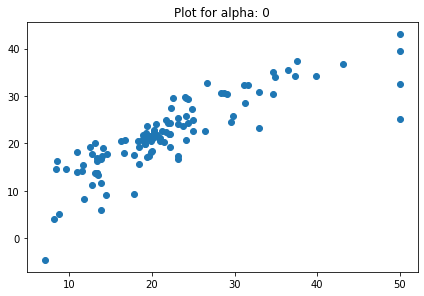

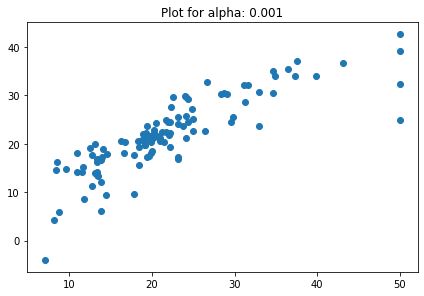

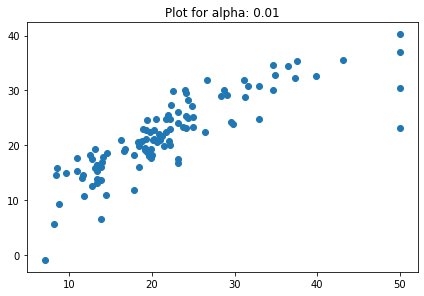

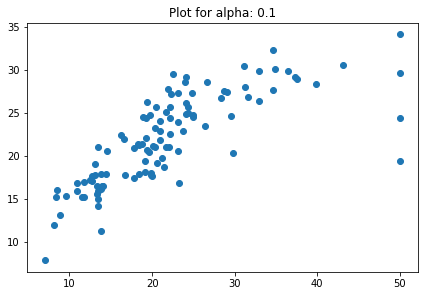

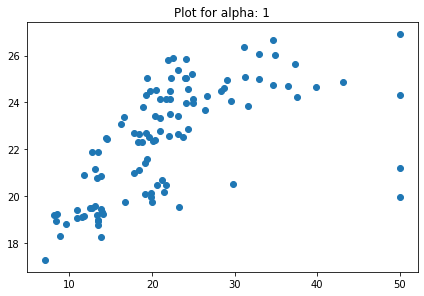

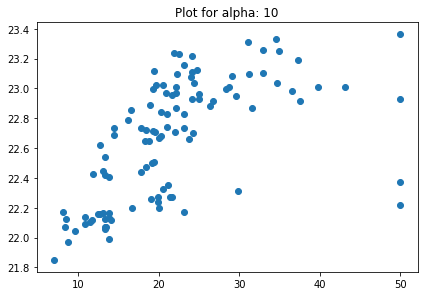

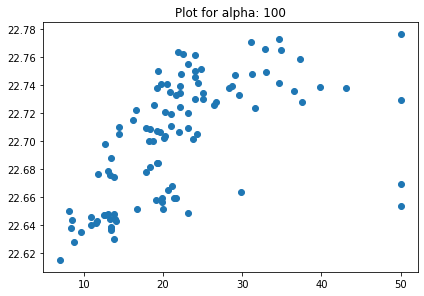

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
alpha_0,2595.222630,10.700828,-5.768478,2.272141,0.594400,1.221706,-4.895072,9.467326,0.035410,-7.951555,3.719866,-3.075087,-4.778459,1.563345,-9.692932
alpha_0.001,2587.811479,11.466925,-5.171915,2.134130,0.456596,1.256632,-4.591465,9.333618,0.028379,-7.498298,3.452940,-2.893551,-4.751228,1.549926,-9.626072
alpha_0.01,2705.674160,15.138606,-2.771981,1.498874,-0.294453,1.436681,-3.005926,8.201664,-0.089471,-5.091659,2.129038,-2.033535,-4.562584,1.461824,-8.794650
alpha_0.1,4193.293389,20.745212,-0.746253,0.968821,-1.132481,1.391826,-1.005770,3.786865,-0.659750,-1.119204,-0.094900,-1.269781,-3.148547,1.010579,-4.441838
alpha_1,6837.590521,22.305478,-0.208122,0.429829,-0.597444,0.375733,-0.474383,0.703574,-0.523827,0.123548,-0.630428,-0.732052,-0.834415,0.363403,-0.967542
alpha_10,8799.761436,22.639459,-0.031802,0.068047,-0.099478,0.044166,-0.083162,0.084053,-0.093223,0.037623,-0.122971,-0.127233,-0.111129,0.056791,-0.126567
alpha_1e+02,9213.427385,22.699289,-0.003378,0.007246,-0.010660,0.004495,-0.008970,0.008624,-0.010062,0.004227,-0.013390,-0.013701,-0.011572,0.006044,-0.013165


In [200]:
#Creation of coefficient matrix for ridge regression. First and second column represent the RMSE and
#the intercept
BHS_matrix_ridge= coeff_matrices(alpha_use, ridge_model, BHS_splitted[0], BHS_splitted[1], BHS_splitted[2], BHS_splitted[3])
BHS_matrix_ridge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4262.233334775894, tolerance: 3.346696305764411
  positive)


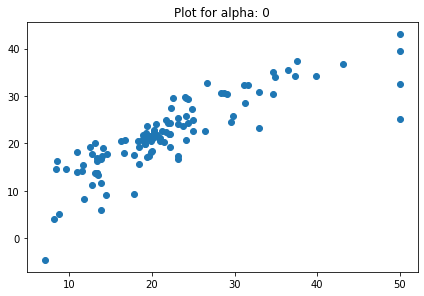

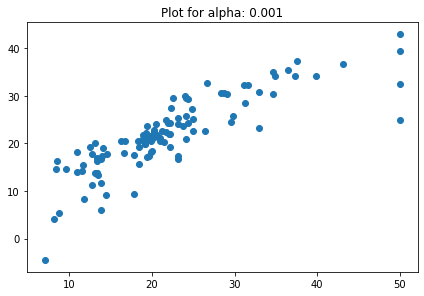

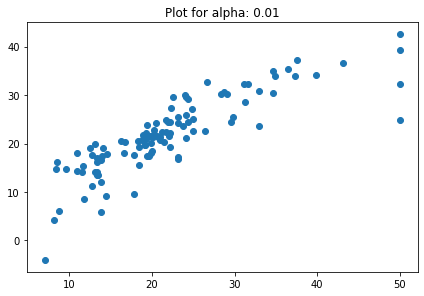

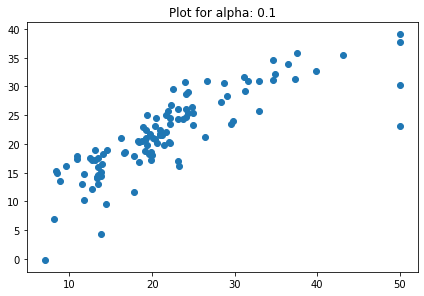

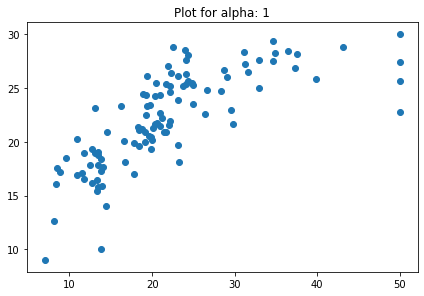

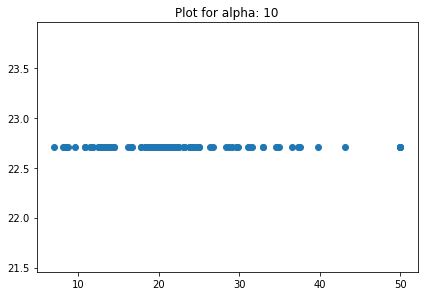

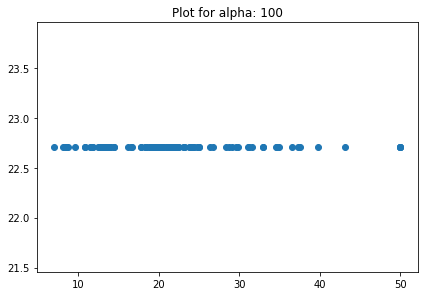

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
alpha_0,2595.222630,10.700828,-5.768478,2.272141,0.594400,1.221706,-4.895072,9.467326,0.035410,-7.951555,3.719866,-3.075087,-4.778459,1.563345,-9.692932
alpha_0.001,2593.829192,10.769833,-5.705138,2.251458,0.561640,1.223805,-4.855900,9.467389,0.024242,-7.920878,3.676373,-3.034295,-4.770987,1.556375,-9.688644
alpha_0.01,2585.161311,11.371747,-5.133285,2.071187,0.266775,1.240191,-4.535336,9.444566,0.000000,-7.603956,3.294470,-2.673764,-4.710057,1.490684,-9.685724
alpha_0.1,2847.619054,17.426337,-0.000000,0.543993,-0.000000,1.215581,-2.284287,9.370450,-0.000000,-3.655324,0.333558,-0.496467,-4.369933,0.876268,-9.976131
alpha_1,4812.870020,19.646422,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.317940,-2.918974,0.000000,-9.100535
alpha_10,9264.600985,22.706516,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
alpha_1e+02,9264.600985,22.706516,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000


In [110]:
#Creation of coefficient matrix for lasso regression. First and second column represent the RMSE and
#the intercept
BHS_matrix_lasso= coeff_matrices(alpha_use, lasso_model, BHS_splitted[0], BHS_splitted[1], BHS_splitted[2], BHS_splitted[3])
BHS_matrix_lasso

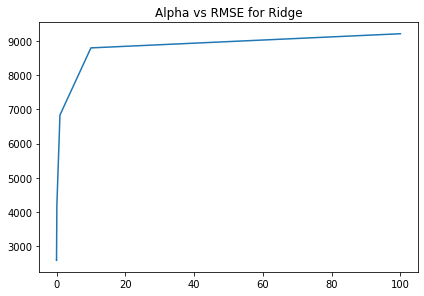

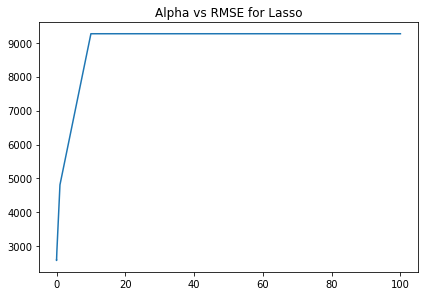

In [111]:
#Plotting the alpha vs RMSE for Ridge and Lasso regressions
plot_rmse(alpha_use, BHS_matrix_ridge, 'Ridge')
plot_rmse(alpha_use, BHS_matrix_lasso, 'Lasso')

### **Question 3**

In [153]:
#From sklearn, return the best alpha and the mean square error
#Using the same alphas as before.
BHS_ridge_mse, BHS_ridge_alpha = ridge_kfold(alpha_use[1:],BHS_splitted[0], BHS_splitted[1])
BHS_lasso_alpha = lasso_kfold(alpha_use[1:], BHS_splitted[0], BHS_splitted[1])

In [160]:
#Reporting the best alphas from the 400 dataset.
print('Ridge best alpha for BH scaled data: '+str(BHS_ridge_alpha))
print('Lasso best alpha for BH scaled data: '+str(BHS_lasso_alpha))

Ridge best alpha for BH scaled data: 1.0
Lasso best alpha for BH scaled data: 0.001


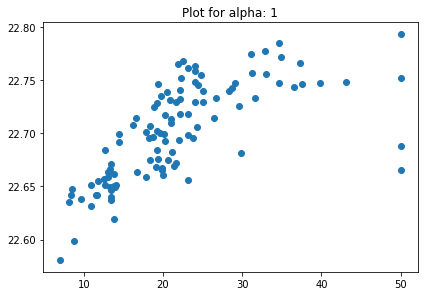

RMSE for best alpha in ridge on BH scaled data: alpha_1    9202.520127
Name: 0, dtype: float64


In [161]:
#Training the data once again using only the best alpha for ridge
BHS_bestalpha_matrix_ridge= coeff_matrices([BHS_ridge_alpha], ridge_model, BHS_splitted[0], BHS_splitted[1], BHS_splitted[2], BHS_splitted[3])
print('RMSE for best alpha in ridge on BH scaled data: '+str(BHS_bestalpha_matrix_ridge[0]))

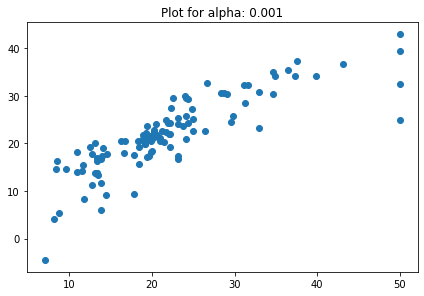

RMSE for best alpha in lasso on BH scaled data: alpha_0.001    2593.829192
Name: 0, dtype: float64


In [162]:
#Training the data once again using only the best alpha for lasso
BHS_bestalpha_matrix_lasso= coeff_matrices([BHS_lasso_alpha], lasso_model, BHS_splitted[0], BHS_splitted[1], BHS_splitted[2], BHS_splitted[3])
print('RMSE for best alpha in lasso on BH scaled data: '+str(BHS_bestalpha_matrix_lasso[0]))

### **Question 4**

In [152]:
#Splitted 400 examples as training and 106 examples as testing (21%)
#Used in both ridge and lasso regressions.
BH_splitted = boston_split(BostonHouse, 0.21)

In [157]:
#Using the same alphas as before.
BH_ridge_mse, BH_ridge_alpha = ridge_kfold(alpha_use[1:],BH_splitted[0], BH_splitted[1])
BH_lasso_alpha = lasso_kfold(alpha_use[1:], BH_splitted[0], BH_splitted[1])

In [163]:
#Reporting the best alphas from the 400 dataset on original BH data.
print('Ridge best alpha for BH original data: '+str(BH_ridge_alpha))
print('Lasso best alpha for BH original data: '+str(BH_lasso_alpha))

Ridge best alpha for BH original data: 0.1
Lasso best alpha for BH original data: 0.001


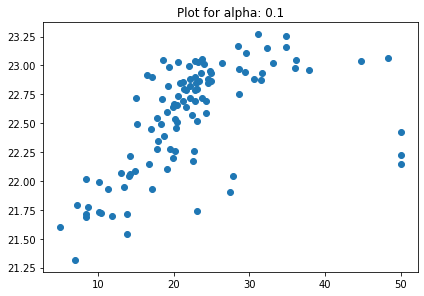

RMSE for best alpha in ridge on BH original data: alpha_0.1    8051.598703
Name: 0, dtype: float64


In [164]:
#Training the data only the best alpha for ridge on BH original data
BH_bestalpha_matrix_ridge= coeff_matrices([BH_ridge_alpha], ridge_model, BH_splitted[0], BH_splitted[1], BH_splitted[2], BH_splitted[3])
print('RMSE for best alpha in ridge on BH original data: '+str(BH_bestalpha_matrix_ridge[0]))

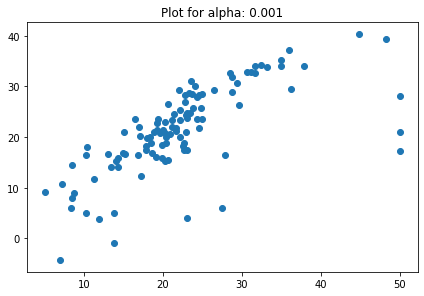

RMSE for best alpha in lasso on BH original data: alpha_0.001    5038.468929
Name: 0, dtype: float64


In [165]:
#Training the data once again using only the best alpha for lasso on BH original data
BH_bestalpha_matrix_lasso= coeff_matrices([BH_lasso_alpha], lasso_model, BH_splitted[0], BH_splitted[1], BH_splitted[2], BH_splitted[3])
print('RMSE for best alpha in lasso on BH original data: '+str(BH_bestalpha_matrix_lasso[0]))

## **Problem 2**

### **Question 1**

In [210]:
#Data split into traiing and testing sets
e2006_data = e2006_split(E2006_train, E2006_test)

In [207]:
print(e2006_data[0].shape,len(e2006_data[1]),e2006_data[2].shape,len(e2006_data[3]))

(3308, 150358) 3308 (16087, 150360) 16087


In [197]:
#Optimal Solutions
e2006_ridge_opt_coef, e2006_ridge_opt_int = optim_ridge_e20(e2006_data)
e2006_lasso_opt_coef, e2006_lasso_opt_int = optim_lasso_e20(e2006_data)

In [198]:
#Visualize the optimum w vector and score for btoh lasso and ridge with alpha = 1
print('ridge cost vector w:'+ str(e2006_ridge_opt_coef), 'ridge best intercept:' +str(e2006_ridge_opt_int))
print()
print('lasso cost vector w:'+str(e2006_lasso_opt_coef), 'lasso best intercept:'+str(e2006_lasso_opt_int))

ridge cost vector w:[ 7.99130684e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
 -2.32376157e-08 -6.97128470e-08] ridge best intercept:-3.5182555830852835

lasso cost vector w:[ 0.  0.  0. ...  0. -0. -0.] lasso best intercept:-3.8200363770516166


### **Question 2**

In [ ]:
#Creation of coefficient matrix for ridge regression for the E2006data
e2006_matrix_ridge= coeff_matrices(alpha_use, ridge_model, e2006_data[0], e2006_data[1], e2006_data[2], e2006_data[3])
e2006_matrix_ridge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4262.233334775894, tolerance: 3.346696305764411
  positive)


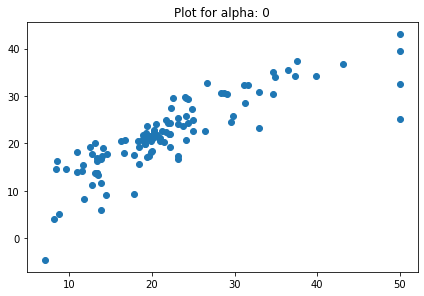

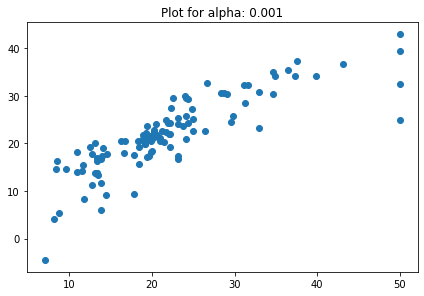

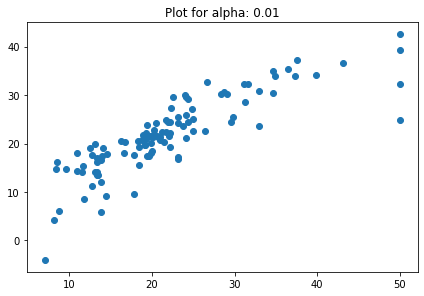

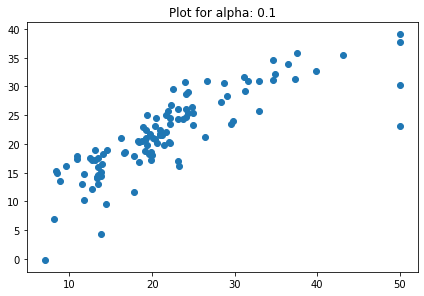

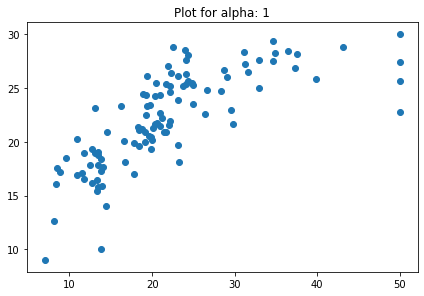

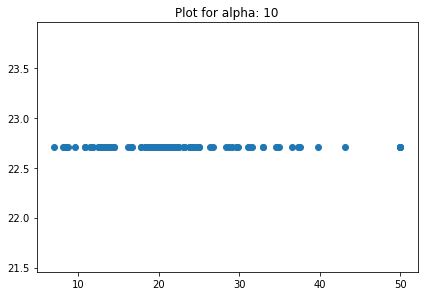

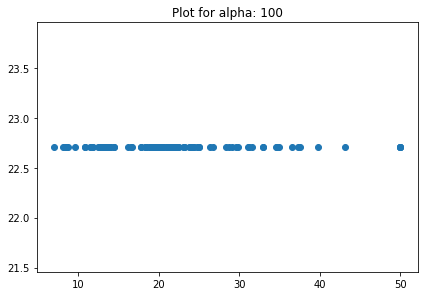

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
alpha_0,2595.222630,10.700828,-5.768478,2.272141,0.594400,1.221706,-4.895072,9.467326,0.035410,-7.951555,3.719866,-3.075087,-4.778459,1.563345,-9.692932
alpha_0.001,2593.829192,10.769833,-5.705138,2.251458,0.561640,1.223805,-4.855900,9.467389,0.024242,-7.920878,3.676373,-3.034295,-4.770987,1.556375,-9.688644
alpha_0.01,2585.161311,11.371747,-5.133285,2.071187,0.266775,1.240191,-4.535336,9.444566,0.000000,-7.603956,3.294470,-2.673764,-4.710057,1.490684,-9.685724
alpha_0.1,2847.619054,17.426337,-0.000000,0.543993,-0.000000,1.215581,-2.284287,9.370450,-0.000000,-3.655324,0.333558,-0.496467,-4.369933,0.876268,-9.976131
alpha_1,4812.870020,19.646422,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.317940,-2.918974,0.000000,-9.100535
alpha_10,9264.600985,22.706516,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
alpha_1e+02,9264.600985,22.706516,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000


In [ ]:
#Creation of coefficient matrix for lasso regression. First and second column represent the RMSE and
#the intercept
e2006_matrix_lasso= coeff_matrices(alpha_use, lasso_model, e2006_data[0], e2006_data[1], e2006_data[2], e2006_data[3])
e2006_matrix_lasso

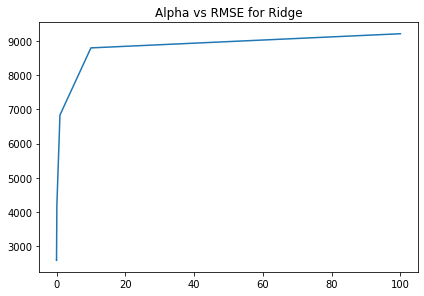

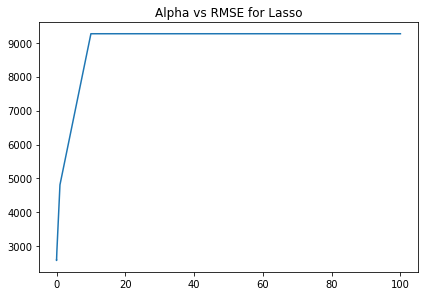

In [ ]:
#Plotting the alpha vs RMSE for Ridge and Lasso regressions
plot_rmse(alpha_use, e2006_matrix_ridge, 'Ridge')
plot_rmse(alpha_use, e2006_matrix_lasso, 'Lasso')

### **Question 3**

In [ ]:
#From sklearn, return the best alpha and the mean square error
#Using the same alphas as before.
e2006_ridge_mse, e2006_ridge_alpha = ridge_kfold(alpha_use[1:],e2006_splitted[0], e2006_splitted[1])
e2006_lasso_alpha = e2006_kfold(alpha_use[1:], e2006_splitted[0], e2006_splitted[1])

In [ ]:
#Reporting the best alphas from the training dataset.
print('Ridge best alpha for e2006 data: '+str(e2006_ridge_alpha))
print('Lasso best alpha for e2006 data: '+str(e2006_lasso_alpha))

Ridge best alpha for BH scaled data: 1.0
Lasso best alpha for BH scaled data: 0.001


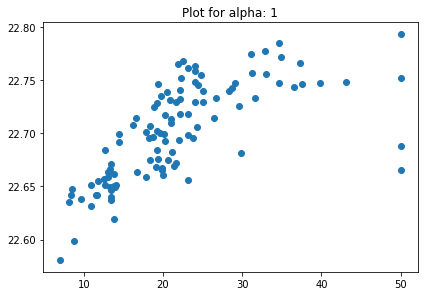

RMSE for best alpha in ridge on BH scaled data: alpha_1    9202.520127
Name: 0, dtype: float64


In [ ]:
#Training the data once again using only the best alpha for ridge
e2006_bestalpha_matrix_ridge= coeff_matrices([e2006_ridge_alpha], ridge_model, e2006_splitted[0], e2006_splitted[1], e2006_splitted[2], e2006_splitted[3])
print('RMSE for best alpha in ridge on e2006 data: '+str(e2006_bestalpha_matrix_ridge[0]))

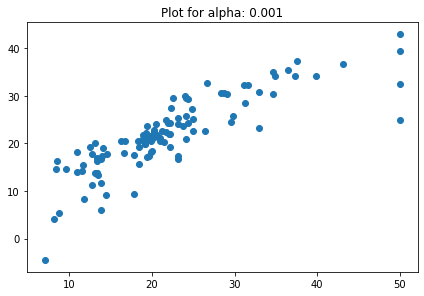

RMSE for best alpha in lasso on BH scaled data: alpha_0.001    2593.829192
Name: 0, dtype: float64


In [ ]:
#Training the data once again using only the best alpha for lasso
e2006_bestalpha_matrix_lasso= coeff_matrices([e2006_lasso_alpha], lasso_model, e2006_splitted[0], e2006_splitted[1], e2006_splitted[2], e2006_splitted[3])
print('RMSE for best alpha in lasso on e2006 data: '+str(e2006_bestalpha_matrix_lasso[0]))